In [3]:
#JJ McCauley + LOGAN KELSCH 
#TEST NN 1

#IMPORT LIBRARIES-------------------------------------------------------

import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from keras.optimizers import SGD
from keras.initializers import GlorotUniform
from keras.initializers import RandomNormal
from keras.callbacks import EarlyStopping
from imblearn.over_sampling import SMOTE

#hahaha dont turn this on with high epoch or else
#tf.config.experimental.set_memory_growth

#LOAD DATA FROM CSV-------------------------------------------------------
'''
# Load the dataset
data = pd.read_csv('catted_1.csv')

#testing random feature drops
#TREND
#''

data = data.drop(columns='vel5')
data = data.drop(columns='vel10')
data = data.drop(columns='vel15')
data = data.drop(columns='vel30')
data = data.drop(columns='vel60')
data = data.drop(columns='acc5')
data = data.drop(columns='acc10')
data = data.drop(columns='acc15')
data = data.drop(columns='acc30')
data = data.drop(columns='acc60')
data = data.drop(columns='stoch12')
data = data.drop(columns='stochDiff6012')
data = data.drop(columns='RSIhl_diff')
data = data.drop(columns='RSIhl_diffROC')
data = data.drop(columns='YM_diff')
data = data.drop(columns='NQ_diff')
#''
#PARTICIPATION


#data = data.drop(columns='vol')
data = data.drop(columns='vol10')
data = data.drop(columns='vol15')
data = data.drop(columns='vol30')
data = data.drop(columns='vol60')
data = data.drop(columns='volD10')
data = data.drop(columns='volD15')
data = data.drop(columns='volD30')
data = data.drop(columns='volD60')
data = data.drop(columns='volNQdiff')
data = data.drop(columns='volYMdiff')
data = data.drop(columns='vpm5')
data = data.drop(columns='vpm10')
data = data.drop(columns='vpm15')
data = data.drop(columns='vpm30')
data = data.drop(columns='vpm60')

#CALENDAR

#data = data.drop(columns='ToD')
#data = data.drop(columns='DoW')
#--------------------------------------
#SOLUTION------------------------------
#data = data.drop(columns='DIR')
data = data.drop(columns='MOVE')
#--------------------------------------
#--------------------------------------
data = data.drop(columns='FT')
data = data.drop(columns='FT.1')
data = data.drop(columns='FT.2')
#TEMP DROP PRE-DUAL-OUTPUT NN

#data = data.drop(columns='CLASS')


#confirming X and Y features post training
Xfeatures = data.columns[:-1]
Yfeatures = data.columns[-1]
print("TESTED FEATURES: ")
print(Xfeatures)
print("TESTING FOR: ")
print(Yfeatures)

#DATA OPTIMIZATION------------------------------------------------------

print("OCCURANCES IN RAW DATA FOR ", Yfeatures, ": ", sep='')
unique, counts = np.unique(data.iloc[:, -1].values, return_counts=True)
print(dict(zip(unique,counts)))

#filtering before splitting could be useful if ABSOLUTELY mostly comprised of 'in'
#MARKET HOURS!
#data = data.drop(data[data['ToD'] > 950].index)
#data = data.drop(data[data['ToD'] < 560].index)
#OTHER MODIFICATIONS
#data = data.drop(data[data['feature'] condition].index)
data = data.drop(data[data['MO'] < 1].index)

upRows = data.drop(data[data['DIR'] != 'up'].index)
dnRows = data.drop(data[data['DIR'] != 'dn'].index)
#mvRows = data.drop(data[data['MOVE'] != 'mv'].index)
#nmRows = data.drop(data[data['MOVE'] != 'nm'].index)

#smallestClass = min(mvRows.index.size, nmRows.index.size)
smallestClass = min(upRows.index.size, dnRows.index.size)
print('Smallest Class Size:',smallestClass,'\n')

upRows = upRows.iloc[0:smallestClass]
dnRows = dnRows.iloc[0:smallestClass]
#mvRows = mvRows.iloc[0:smallestClass]#-2500]
#nmRows = nmRows.iloc[0:smallestClass]#-2500]

optData = pd.concat([upRows, dnRows],axis=0)
#optData = pd.concat([mvRows, nmRows],axis=0)

print("OCCURANCES IN OPT DATA FOR ", Yfeatures, ": ", sep='')
unique, counts = np.unique(optData.iloc[:, -1].values, return_counts=True)
print(dict(zip(unique,counts)))


#percIn = data.size/(mvRows.size*2)
#percNin = data.size/(nmRows.size*2)
weight_for_0 = .5
weight_for_1 = .5
cw = {0: weight_for_0, 1: weight_for_1}
classWeights = list(cw.values())

#PROCESS THE DATA-------------------------------------------------------

# Separate features and target
X = optData.iloc[:, :-1].values
y = optData.iloc[:, -1].values

#SMOTE OVERSAMPLING________________

#smote = SMOTE()
#X, y = smote.fit_resample(X,y)
#print('\n[PRE-SPLIT] Resampled Data size:',X.size,'--',y.size)

#__________________________________


#Encoding data
labelencoder = LabelBinarizer()
y = labelencoder.fit_transform(y)


'''
data2 = pd.read_csv('dm_test2day.csv')
'''

data2 = data2.drop(columns='vel5')
data2 = data2.drop(columns='vel10')
data2 = data2.drop(columns='vel15')
data2 = data2.drop(columns='vel30')
data2 = data2.drop(columns='vel60')
data2 = data2.drop(columns='acc5')
data2 = data2.drop(columns='acc10')
data2 = data2.drop(columns='acc15')
data2 = data2.drop(columns='acc30')
data2 = data2.drop(columns='acc60')
data2 = data2.drop(columns='stoch12')
data2 = data2.drop(columns='stochDiff6012')
data2 = data2.drop(columns='RSIhl_diff')
data2 = data2.drop(columns='RSIhl_diffROC')
data2 = data2.drop(columns='YM_diff')
data2 = data2.drop(columns='NQ_diff')
'''
#PARTICIPATION


#data = data.drop(columns='vol')
data2 = data2.drop(columns='vol10')
data2 = data2.drop(columns='vol15')
data2 = data2.drop(columns='vol30')
data2 = data2.drop(columns='vol60')
data2 = data2.drop(columns='volD10')
data2 = data2.drop(columns='volD15')
data2 = data2.drop(columns='volD30')
data2 = data2.drop(columns='volD60')
data2 = data2.drop(columns='volNQdiff')
data2 = data2.drop(columns='volYMdiff')
data2 = data2.drop(columns='vpm5')
data2 = data2.drop(columns='vpm10')
data2 = data2.drop(columns='vpm15')
data2 = data2.drop(columns='vpm30')
data2 = data2.drop(columns='vpm60')

#CALENDAR

#data2 = data2.drop(columns='ToD')
#data2 = data2.drop(columns='DoW')
#--------------------------------------
#SOLUTION------------------------------
#data = data.drop(columns='DIR')
data2 = data2.drop(columns='MOVE')
#--------------------------------------
#--------------------------------------
data2 = data2.drop(columns='FT')
data2 = data2.drop(columns='FT.1')
data2 = data2.drop(columns='FT.2')
data2 = data2.drop(data2[data2['MO'] < 1].index)
X2 = data2.iloc[:, :-1].values
y2 = data2.iloc[:, -1].values

# Standardize the features
scaler = StandardScaler()
scaler.fit(X2)

labelencoder = LabelBinarizer()
y2 = labelencoder.fit_transform(y2)
X2 = scaler.transform(X2)



from keras.saving import get_custom_objects
from keras.saving import register_keras_serializable
from tensorflow.keras import backend as K

get_custom_objects().clear()

#CUSTOM LOSS 1_______________________________________________________________________________________________
@register_keras_serializable(name="custom_loss")

def custom_loss(y_true, y_pred):
    # Convert one-hot encoded labels to class indices
    true_class = K.argmax(y_true, axis=-1)
    pred_class = K.argmax(y_pred, axis=-1)

    # Create a matrix where misclassifications (farthest ones) are heavily penalized
    inverse_misclass = tf.logical_or(
        tf.logical_and(K.equal(true_class, 0), K.equal(pred_class, 3)),  # True class 0, predicted class 3
        tf.logical_and(K.equal(true_class, 3), K.equal(pred_class, 0))   # True class 3, predicted class 0
    )
    bad1_misclass = tf.logical_or(
        tf.logical_and(K.equal(true_class, 0), K.equal(pred_class, 2)),  # True class 0, predicted class 3
        tf.logical_and(K.equal(true_class, 1), K.equal(pred_class, 3)),  # True class 0, predicted class 3
    )
    bad2_misclass = tf.logical_or(
        tf.logical_and(K.equal(true_class, 2), K.equal(pred_class, 0)),  # True class 0, predicted class 3
        tf.logical_and(K.equal(true_class, 3), K.equal(pred_class, 1))   # True class 3, predicted class 0
    )
    # Create a matrix where correct predictions for 0-0 and 3-3 are rewarded
    extrema_correct = tf.logical_or(
        tf.logical_and(K.equal(true_class, 0), K.equal(pred_class, 0)),  # True class 0, predicted class 0
        tf.logical_and(K.equal(true_class, 3), K.equal(pred_class, 3)),  # True class 1, predicted class 1
    )
    fair_correct = tf.logical_or(
        tf.logical_and(K.equal(true_class, 1), K.equal(pred_class, 1)),  # True class 2, predicted class 2
        tf.logical_and(K.equal(true_class, 2), K.equal(pred_class, 2))   # True class 3, predicted class 3
    )
    

    # Standard categorical crossentropy loss
    base_loss = tf.keras.losses.binary_crossentropy(y_true, y_pred)

    # Add an additional penalty for farthest misclassifications
    pen_inverse = 4.0  # You can adjust this penalty factor
    pen_inverse_loss = K.cast(inverse_misclass, tf.float32) * pen_inverse

    pen_bad1 = 0.0  # You can adjust this penalty factor
    pen_bad1_loss = K.cast(bad1_misclass, tf.float32) * pen_bad1

    pen_bad2 = 0.0  # You can adjust this penalty factor
    pen_bad2_loss = K.cast(bad2_misclass, tf.float32) * pen_bad2

    # Add a reward for correct 0-0 and 3-3 predictions (negative penalty)
    rew_extrema = 4.0  # You can adjust this reward factor
    rew_extrema_gain = K.cast(extrema_correct, tf.float32) * rew_extrema

    rew_fair = 0.0  # You can adjust this reward factor
    rew_fair_gain = K.cast(fair_correct, tf.float32) * rew_fair

    # Return the combined loss: base loss + penalties - rewards
    return base_loss + (pen_inverse_loss + pen_bad1_loss + pen_bad2_loss) - (rew_extrema_gain + rew_fair_gain)

#CUSTOM LOSS 2____________________________________________________________________________________________________
@register_keras_serializable(name="focal_loss")
def focal_loss(gamma=2.0):
    """
    Parameters:
    - gamma: Focusing parameter that adjusts the rate at which easy examples are down-weighted.
             Default value is 2. Higher values make the loss more focused on hard examples.
             
    - alpha: Class balancing factor to balance the loss for each class. Default is 0.25.
             Adjust this to address class imbalance. Can be a scalar or a list of weights
             per class.
    """
    #gamma = 2.0
    alpha = classWeights
 
    @register_keras_serializable(name="focal_loss_fixed")
    def focal_loss_fixed(y_true, y_pred):
        """
        Compute the focal loss between ground truth (y_true) and predicted values (y_pred).
        
        Arguments:
        - y_true: Tensor of true labels (one-hot encoded, shape = [batch_size, num_classes]).
        - y_pred: Tensor of predicted probabilities (shape = [batch_size, num_classes]).
        
        Returns:
        - loss: A scalar tensor representing the computed focal loss.
        """
        # Clip predictions to prevent log(0) or division by zero
        y_pred = tf.clip_by_value(y_pred, tf.keras.backend.epsilon(), 1. - tf.keras.backend.epsilon())
        
        # Compute the cross-entropy loss (standard loss component)
        cross_entropy_loss = -y_true * tf.math.log(y_pred)
        
        # Compute the modulating factor: (1 - p_t)^gamma
        # where p_t is the predicted probability for the true class
        modulating_factor = tf.pow(1. - y_pred, gamma)
        
        # Compute the final focal loss: alpha * modulating_factor * cross_entropy_loss
        loss = alpha * modulating_factor * cross_entropy_loss
        
        # Reduce the loss along the batch dimension
        return tf.reduce_mean(tf.reduce_sum(loss, axis=-1))
    
    return focal_loss_fixed
#CUSTOM LOSS 3_____________________________________________________________________________________________
@register_keras_serializable(name="weighted_rec_pre_loss")
def weighted_rec_pre_loss(func='wr',weight=5.0):
    """
    Custom loss function to optimize for recall OR for precision.
    func should equal wr or wp
    for weighted recall or weighted precision
    """
    @register_keras_serializable(name='wp_loss')
    def wp_loss(y_true, y_pred):
        # Clip predictions to prevent log(0) or division by zero
        y_pred = tf.clip_by_value(y_pred, tf.keras.backend.epsilon(), 1 - tf.keras.backend.epsilon())
        # Standard binary cross-entropy
        base_loss = -y_true * tf.math.log(y_pred) - (1 - y_true) * tf.math.log(1 - y_pred)
        # Apply higher weight to positive samples (to penalize false negatives more)
        loss = (1 - y_true) * weight * base_loss + y_true * base_loss
        return tf.reduce_mean(loss)
    
    @register_keras_serializable(name="wr_loss")
    def wr_loss(y_true, y_pred):
        # Clip predictions to prevent log(0) or division by zero
        y_pred = tf.clip_by_value(y_pred, tf.keras.backend.epsilon(), 1 - tf.keras.backend.epsilon())
        # Standard binary cross-entropy
        base_loss = -y_true * tf.math.log(y_pred) - (1 - y_true) * tf.math.log(1 - y_pred)
        # Apply higher weight to positive samples (to penalize false negatives more)
        loss = weight * y_true * base_loss + (1 - y_true) * base_loss
        return tf.reduce_mean(loss)
    
    
    
    if(func=='wr'):
        return wr_loss
    else:
        return wp_loss
#CUSTOM LOSS 4_____________________________________________________________________________________________


#metric_ratio = 1.0  # Initialize globally
@register_keras_serializable(name="met_ratio")
def met_ratio(y_true, y_pred, base_weight=1.0):
    crnt_metric_ratio = metric_ratio
    
    # Clip predictions to prevent log(0) or division by zero
    y_pred = tf.clip_by_value(y_pred, tf.keras.backend.epsilon(), 1 - tf.keras.backend.epsilon())
    
    # Standard binary cross-entropy loss
    base_loss = -y_true * tf.math.log(y_pred) - (1 - y_true) * tf.math.log(1 - y_pred)
    
    # Adjust weight using precision_ratio (balance training and validation precision)
    adjusted_weight = base_weight / (crnt_metric_ratio + 1e-7)
    
    # Apply the dynamic weight to false positives
    weighted_loss = (1 - y_true) * adjusted_weight * base_loss + y_true * base_loss
    
    return tf.reduce_mean(weighted_loss)

#END CUSTOM LOSSES__________________________________________________________________________________________

loaded_model = tf.keras.models.load_model('dm_DIR_2.keras')#,custom_objects={"custom_loss":custom_loss})


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


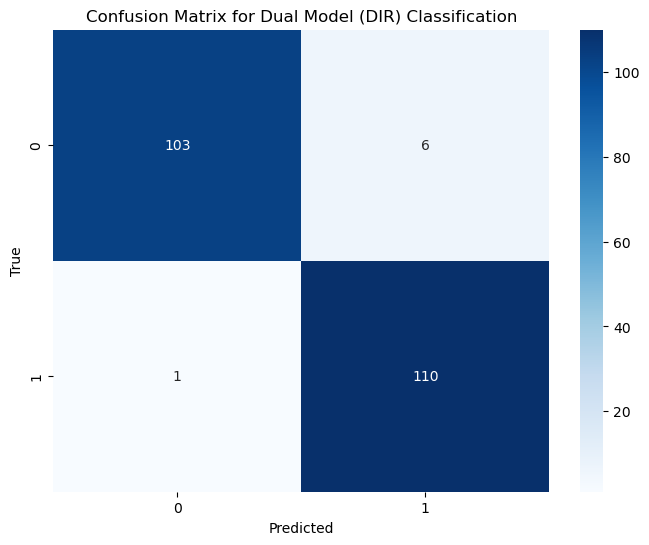

In [4]:
#predicting the test set results
threshold = 0.5
y_pred = loaded_model.predict(X2)
y_pred = (y_pred > threshold)

#making a confusion matrix
cm = confusion_matrix(y2, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Dual Model (DIR) Classification')
plt.show()

#PRINTS OUT ALL GUESSES
#[print(x) for x in y_pred]